# Exam 3 Code Component MAD 2502 Spring 2022
## Name: Matthew Peck

### Question 1 Part A

Create a class called *my_monimal_fit(x_data, y_data, m)* that calculates the best fit line through the monomial $y=ax^m$ for the data set *x_data* and *y_data*. Make sure to set $m=1$ if not specified. 
- Create an **exception** if $m\le0$ or len$(x) \not= $ len$(y)$
- self.a will return the value of $a$ that was derived from the written portion of this exam.
- self.ymean will return the mean of y.  
- Write a method called *SSres()* that returns the numerical value $\displaystyle \sum_{i=1}^n(y_i - a \cdot x_i^n)^2$ 
- Write a method called *SSreg()* that returns the numerical value $\displaystyle \sum_{i=1}^n(a \cdot x_i^n - \hat{y})^2$ where $\hat{y}$ is the mean of y.
- Write a method called *SStot()* that returns $SSreg + SSres = \displaystyle \sum_{i=1}^n(y_i - \hat{y})^2$
- Write a method called *R2* that returns the $R^2 = \dfrac{SSreg}{SStot}$.
- write a method called display that shows shows a graph of the data points with the curve. The title should say the data with with the equation of the line. Hint: Use the min and max of x-data to the set the domain of the min and max of the y-data to set the range of the plot. 
- Create a **\_\_str\_\_** method that prints the value of $a$ with the R^2 value clearly labeled. 

In [1]:
#Imports
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

In [2]:
class my_monomial_fit(object):
    #Parameters
    def __init__(self, x_data, y_data, m=1):
        self.x = x_data
        self.y = y_data
        self.m = m
        self.a = sum(self.y * (self.x**self.m)) / sum(self.x ** (2*self.m))
        self.y_bar = np.mean(y)
        
        if(m <= 0):
            raise Exception("m is not greater than 0")
        if (len(x) != len(y)):
            raise Exception("length of x and y are not equal")
           
    #Functions
    def SSres(self):
        AXraisedM = self.a * self.x**(self.m)
        return sum ((self.y - AXraisedM)**2)
               
    def SSreg(self):
        AXraisedM = self.a * self.x**(self.m)
        return sum ((AXraisedM - self.y_bar)**2)
   
    def SStot(self):
        total = self.SSres() + self.SSreg() 
        return total
   
    def R2(self):    
        Rto2 = 1 - self.SSres() / self.SStot()
        return Rto2
   
    #Print Statements and Graphs
    def __str__(self):
        return ("a = " + str(self.a)+" and R^2 = " + str(self.R2()))
    
    def display(self):
     
        self.x1 = np.linspace(np.min(self.x) - 1, np.max(self.x) + 1, num=100)
        plt.scatter(self.x, self.y)
        plt.plot(self.x1, (self.a * self.x1**(self.m)))
        plt.title(f"Scatter Plot with Best fit y = {self.a}x^ {self.m}")
        plt.xlabel('X')
        plt.ylabel('Y')

In [3]:
#Sample output
x = np.array([1, 2, 4,  5])
y = np.array([0, 5, 15, 26])

#use str and set as a variable and then print
data1 = my_monomial_fit(x, y, 2)
print(data1) #Should display: a = 1.0133630289532294 with R^2 = 0.989971205026032

a = 1.0133630289532294 and R^2 = 0.9899712050260319


In [4]:
print(data1.y_bar)   #Output: 11.5

11.5


In [5]:
print(data1.SSreg()) #Output: 379.022271714922

379.0222717149221


In [6]:
print(data1.SSres()) #Output: 3.83964365256125

3.839643652561245


In [7]:
print(data1.SStot()) #Output: 382.861915367483

382.86191536748333


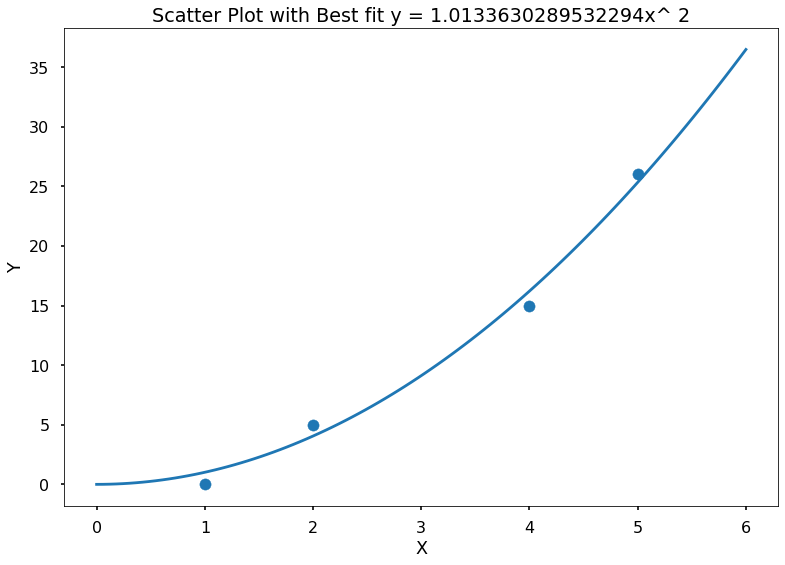

In [8]:
data1.display()
##Hint: create a new list called x1 that starts at a = x.min()-1 and goes to  b = x.max()+1 with 
##stepsize (b-a)/100 to create a nice smooth curve. 

### Question 1 Part B
You are given a data set below, and determine which monomial $y=ax^m$ is the best fit for the data set with $m = 1, 2, 3, 4, 5$. Compare the $R^2$ values. 

In [9]:
x = np.array([0.  , 0.03, 0.06, 0.09, 0.12, 0.15, 0.18, 0.21, 0.24, 0.27, 0.3 ,
       0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.51, 0.54, 0.57, 0.6 , 0.63,
       0.66, 0.69, 0.72, 0.75, 0.78, 0.81, 0.84, 0.87, 0.9 , 0.93, 0.96,
       0.99, 1.02, 1.05, 1.08, 1.11, 1.14, 1.17, 1.2 , 1.23, 1.26, 1.29,
       1.32, 1.35, 1.38, 1.41, 1.44, 1.47, 1.5 , 1.53, 1.56, 1.59, 1.62,
       1.65, 1.68, 1.71, 1.74, 1.77, 1.8 , 1.83, 1.86, 1.89, 1.92, 1.95,
       1.98, 2.01, 2.04, 2.07, 2.1 , 2.13, 2.16, 2.19, 2.22, 2.25, 2.28,
       2.31, 2.34, 2.37, 2.4 , 2.43, 2.46, 2.49, 2.52, 2.55, 2.58, 2.61,
       2.64, 2.67, 2.7 , 2.73, 2.76, 2.79, 2.82, 2.85, 2.88, 2.91, 2.94,
       2.97, 3.  ])

y = np.array([8.47813159e-02, 8.48758159e-02, 8.55373159e-02, 8.73328159e-02,
       9.08293159e-02, 9.65938159e-02, 1.05193316e-01, 1.17194816e-01,
       1.33165316e-01, 1.53671816e-01, 1.79281316e-01, 2.10560816e-01,
       2.48077316e-01, 2.92397816e-01, 3.44089316e-01, 4.03718816e-01,
       4.71853316e-01, 5.49059816e-01, 6.35905316e-01, 7.32956816e-01,
       8.40781316e-01, 9.59945816e-01, 1.09101732e+00, 1.23456282e+00,
       1.39114932e+00, 1.56134382e+00, 1.74571332e+00, 1.94482482e+00,
       2.15924532e+00, 2.38954182e+00, 2.63628132e+00, 2.90003082e+00,
       3.18135732e+00, 3.48082782e+00, 3.79900932e+00, 4.13646882e+00,
       4.49377332e+00, 4.87148982e+00, 5.27018532e+00, 5.69042682e+00,
       6.13278132e+00, 6.59781582e+00, 7.08609732e+00, 7.59819282e+00,
       8.13466932e+00, 8.69609382e+00, 9.28303332e+00, 9.89605482e+00,
       1.05357253e+01, 1.12026118e+01, 1.18972813e+01, 1.26203008e+01,
       1.33722373e+01, 1.41536578e+01, 1.49651293e+01, 1.58072188e+01,
       1.66804933e+01, 1.75855198e+01, 1.85228653e+01, 1.94930968e+01,
       2.04967813e+01, 2.15344858e+01, 2.26067773e+01, 2.37142228e+01,
       2.48573893e+01, 2.60368438e+01, 2.72531533e+01, 2.85068848e+01,
       2.97986053e+01, 3.11288818e+01, 3.24982813e+01, 3.39073708e+01,
       3.53567173e+01, 3.68468878e+01, 3.83784493e+01, 3.99519688e+01,
       4.15680133e+01, 4.32271498e+01, 4.49299453e+01, 4.66769668e+01,
       4.84687813e+01, 5.03059558e+01, 5.21890573e+01, 5.41186528e+01,
       5.60953093e+01, 5.81195938e+01, 6.01920733e+01, 6.23133148e+01,
       6.44838853e+01, 6.67043518e+01, 6.89752813e+01, 7.12972408e+01,
       7.36707973e+01, 7.60965178e+01, 7.85749693e+01, 8.11067188e+01,
       8.36923333e+01, 8.63323798e+01, 8.90274253e+01, 9.17780368e+01,
       9.45847813e+01])

In [10]:
#run function 5 times, comment telling us which one is the best one based on the comparing the r^2
data1 = my_monomial_fit(x, y, 1)
data2 = my_monomial_fit(x, y, 2)
data3 = my_monomial_fit(x, y, 3)
data4 = my_monomial_fit(x, y, 4)
data5 = my_monomial_fit(x, y, 5)
print(data1) #Should display: a = 1.0133630289532294 with R^2 = 0.989971205026032
print(data2) 
print(data3) 
print(data4) 
print(data5) 

a = 19.130549753375163 and R^2 = 0.592119556763549
a = 8.80893253196388 and R^2 = 0.9415102980784219
a = 3.505414145536733 and R^2 = 0.9999945207312627
a = 1.307903565348792 and R^2 = 0.9756420256224184
a = 0.4712888357222591 and R^2 = 0.9314699952884884


### Question 2 Part a
Based on your work for the written component, create a function called *my_sqrt(a, TOL)* that uses Newton's to approximate the square root of $x$ within a tolerance of TOL. $|f(p_n)| < TOL$. Please an initial guess based on the value of $a$ as in the written component. 

Note: You should create an exception if $a<0$ or $TOL<0$. 

In [22]:
import math
def my_sqrt(x0, TOL):
    
    #Checking Exceptions
    try:
        float (math.sqrt(x0))
    except:
        printing = "Exception: x0 is less than 0"
        return printing
    try:
        float (math.sqrt(TOL))
    except:
        printing = "Exception: TOL is less than 0"
        return printing
    
    print()
    #Function and Derivative Function
    def f(x):
        return x**2 - 5
    def g(x):
        return 2*x
    
    #Variables
    steps = 1
    parity = True
    
    #while loop
    while (parity == True):
        if g(x0) == 0.0:
            print('Divide by zero error!')
            break
        
        x1 = x0 - f(x0)/g(x0)
        print(f"Iteration: {steps}; x1 = {x1} and f(x1) = {f(x1)} ")
        x0 = x1
        steps = steps + 1
        parity = abs(f(x1)) > TOL
    
    #Root Value and Number of Steps
    print()
    print('The root is: ' + str(x1))
    print('The number of steps required: ')
    return(steps)


#my_sqrt(5, 1e-6) #1e-6

In [23]:
my_sqrt(5, -1) #Output: 2.236067977499978

'Exception: TOL is less than 0'

### Question 2 Part b

In class, we created the following *my_bisection* code. How many steps does it take to perform the bisection for $f(x)=x^2-5$ over the interval $[0,5]$ with a tolerance of $1e-6$?? How many steps does it take to your code in Part (a) to perform *my_sqrt(5, 1e-6)*? Use global variables as needed. 

In [13]:
def my_bisection(f, a, b, tol, tally): 
    # approximates a root, R, of f bounded 
    # by a and b to within tolerance 
    # | f(m) | < tol with m the midpoint 
    # between a and b Recursive implementation
    
    # check if a and b bound a root
    if np.sign(f(a)) == np.sign(f(b)):
        raise Exception(
         "The scalars a and b do not bound a root")
        
    # get midpoint
    m = (a + b)/2
    
    if np.abs(f(m)) < tol:
        # stopping condition, report m as root
        return tally
    elif f(a)*f(m) > 0:
        # case where m is an improvement on a. 
        # Make recursive call with a = m
        tally = tally + 1
        return my_bisection(f, m, b, tol, tally)
    else:
        # case where m is an improvement on b. 
        # Make recursive call with b = m
        tally = tally + 1
        return my_bisection(f, a, m, tol, tally)
    

In [14]:
##Code here
PtA = my_sqrt(5, 1e-6)
f = lambda x: x**2 - 5
PtB = my_bisection(f, 0, 5, 1e-6, 0)
print("Newton-Raphson's Steps: " + str(PtA))
print("Bisection Method Steps: " + str(PtB))


Iteration: 1; x1 = 3.0 and f(x1) = 4.0 
Iteration: 2; x1 = 2.3333333333333335 and f(x1) = 0.44444444444444553 
Iteration: 3; x1 = 2.238095238095238 and f(x1) = 0.009070294784581101 
Iteration: 4; x1 = 2.2360688956433634 and f(x1) = 4.106063730802134e-06 
Iteration: 5; x1 = 2.236067977499978 and f(x1) = 8.428813202954188e-13 

The root is: 2.236067977499978
The number of steps required: 
Newton-Raphson's Steps: 6
Bisection Method Steps: 23


### Question 3 Part A

Let $0\le t \le 2\pi$ and fix $a$ and $b$. 

$$\begin{align}
x(t) &= \cos(at)\\
y(t) &= \sin(bt)
\end{align}$$

Create a function called *cool_graph(a, b, n)* where $n$ is the number points. 

Hint: Let t = np.arange(0, 2*np.pi, 2*np.pi/n) and include plt.grid()

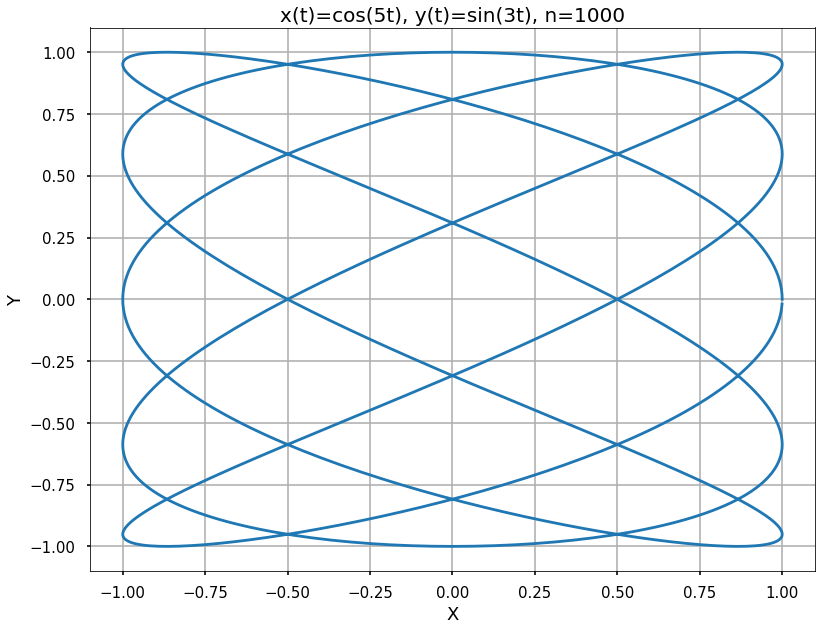

In [15]:
#imports
import numpy as np
import matplotlib.pyplot as plt

def cool_graph(a, b, n):
    #functions
    t = np.arange(0, 2*np.pi, 2*np.pi/n)
    x = np.cos(a * t)
    y = np.sin(b * t)
    
    #graph parameters
    plt.figure(figsize = (13,10))
    plt.plot(x, y)
    plt.title('x(t)=cos(5t), y(t)=sin(3t), n=1000', fontsize = 20)
    plt.xlabel('X', fontsize = 18)
    plt.ylabel('Y', fontsize = 18)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.grid()
    plt.show()
    
cool_graph(5, 3, 1000)

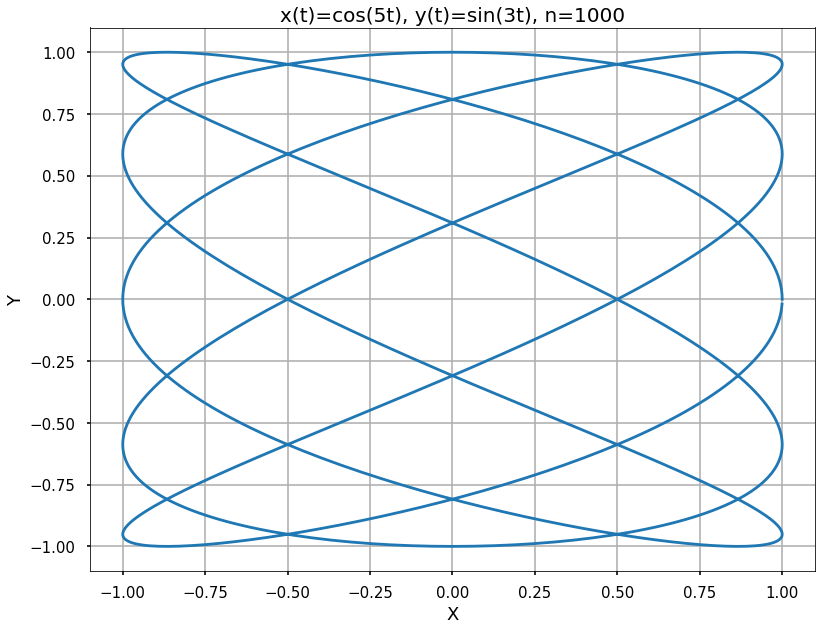

In [16]:
cool_graph(5, 3, 1000)  #Output should look like this below:

### Question 3 Part B

Modify your code to create 2 subplots. The graph on the left with $a=5$, $b=1$ and the one right with $a=5$ and $b=2$ both with $n=1000$.

Hint: Does **NOT** need to be a function, but a plot with a subplot. 

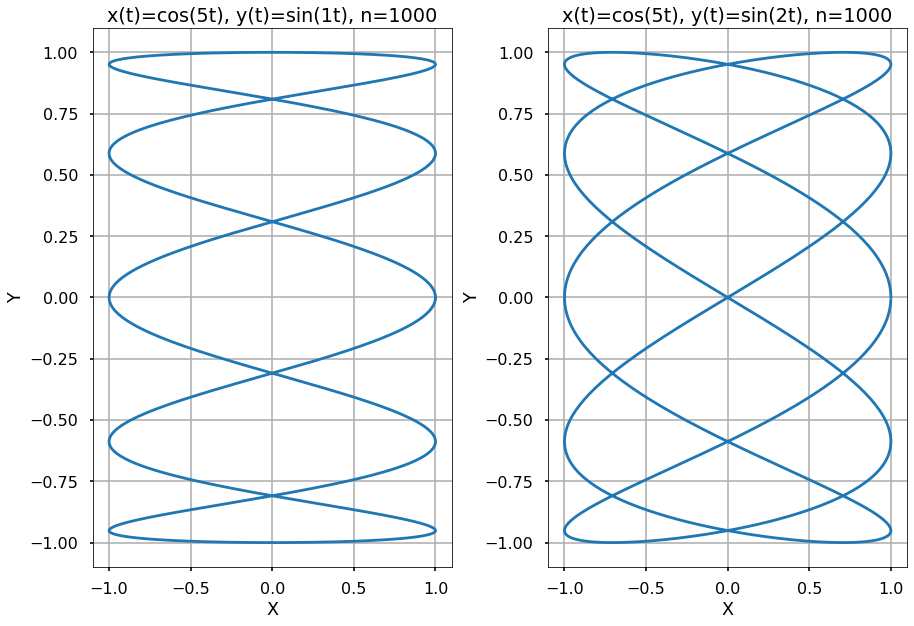

In [17]:
##Code here
#put 2 graphs side by side using the subplot command (5, 1) and (5, 2)
#imports
import numpy as np
import matplotlib.pyplot as plt

def cool_graph(a, b, n):
    #functions
    t = np.arange(0, 2*np.pi, 2*np.pi/n)
    x = np.cos(a * t)
    y = np.sin(b * t)
    
    plt.subplot(1, 2, 1)
    #graph parameters
    plt.plot(x, y)
    plt.title('x(t)=cos(5t), y(t)=sin(1t), n=1000')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid()
    
    b = 2
    y = np.sin(b * t)
    plt.subplot(1, 2, 2)
    plt.plot(x, y)
    plt.title('x(t)=cos(5t), y(t)=sin(2t), n=1000')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid()
    
    plt.tight_layout()
    plt.show()
    
cool_graph(5, 1, 1000)